In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera

# Getting  from $X \to Y$ with Alchemy and Magic: 
## An Abreviated Intro to Deep Learning By Sam Bateman
Big thanks for CS231n from Stanford for the code for the spiral dataset and visualization of it. Their course is fantastic, online and free. Check it out: http://cs231n.stanford.edu/

# Function Approximation
I think it is reasonable that everyone has been exposed to functions at some point in their mathematical career.
But I think everyone is aware that solving math problems by hand is pretty tedious and not a business that we want to be in generally.

When we start to leverage computers for these tasks, some functions, such as 
\begin{align}
f(x) = ax + b, a,b \in \mathbb{R}\\
f(\hat{x}) = < x, x^2, x^3>
\end{align}
which are trivial to handle.
However, the set of functions which we can describe using the operations provided to us by the computer directly is, in general, quite small. This leads us into the desire to perform function approximation.

Many people have seen approximation techniques such as linear/logistic regression, or polynomial interpolation, or Taylor series. Each of them has their own caviates. 

Taylor series, for example, are quite useful in approximating continuous closed-form expressions such as $e^x$ and $sin(x)$ and even give us a error bound which we can shrink arbitrarily. However they require you to have all order derivitives of a function at a point with respect to every variable. I don't think that images are generally willing to disclose this information with regards to their pixels.

Linear regression and interpolation don't require this information, infact, they don't require the function to be writen down at all. However, they each have their weaknesses, linear regression requiring that, using a given transformation on the inputs, some set of data in linear in their outputs. Interpolation is always correct precisely at the point of the input, but doesn't always generalize well to points which aren't in the set of examples.

Further, what happens if the inputs and outputs we have described are not values in a set, but drawn from a distribution $X \times Y$, where both $X$ and $Y$ are corrolated random variables. At this point, interpolation and most analytic approximations such as Fourier Series and Taylor Polynomials are hosed. In fact, most regression approaches are hosed, after all, the stochastic function $f: X \to Y$ which we wish to approximate isn't even a proper function, taking on many different image values for any individual $x \in X$. 

At this point, talking about sets of inputs and outputs and examples is getting rather exhausting, so we will introduce some definitions, where the random variable of elements in the domain of our approximated function is $X$ and the distribution which we assume lies in the range of our approximated function is $Y$:
 - Oracle:
     - A function $f: X \to Y$ such that $\forall (x,y) \in X \times Y, f(x) = y$
 - Model/Hypothesis:
     - A function $h:X \to Y$ which maps realizations from $X$ to $E[Y]$ where $h \in H$ and $H$ is the set of all hypothesis
 - Training Set
     - A set of example pairs $(x, y), x \in \text{support}(X), y \in \text{support}(Y)$ which have previously been drawn from the distribution $X \times Y$.
 - Training Time/Learning:
     - Period of time during which our learning algorithm observes the training set and produces a model to generally map realizations of $X \to E[Y]$.
 - Test Time/ Evaluation:
     - Period of time during which our model observes only realizations of $X$ and must predict $E[Y | X]$.
 - Test Set
     - A set of realizations of $X \times Y$ which cannot be known to our learning algorithm during Training Time.
 - Validation Set
     - A subset of the Training Set which we exclude from training to act as a mock Test Set. This lets us evaluate and train our model on data it hasn't seen in training without actually having to run it on the test data. If we had a Test Set which we could evaluate our model on after training, we may tweak parameters or choices of our model and, over time, introduce a bias of our model to perform better on the test set, which may not be totally representitive of the true realizations which will be seen during test time. Thus, by testing on a validation set, we will only bias towards the validation set and the training set will remain, as far as we are concerned, a good approximation for a set of random samples from the distribution $X \times Y$.
     
In general, the problem of minimizing the error defined by a given error metric $L: H \times X \to \mathbb{R}$ which is minimized when the hypothesis is equal to the oracle is that of Statistical Learning, more commonly known as Machine Learning. Often this isn't possible, but one can feasibly get $\epsilon$ close (if one is intrested in this, there is much more information of the specifics of this, see Understanding Machine Learning: From Theory to Algorithms by Shai^2).

For most problems, Machine Learning is not the answer. Many intresting regression problems as we have posed can be solved programatically. After all, that is what most programs are just regression: computing $y$ from $x$. But, sometimes a program just is too rigid in its framework to handle nuanced tasks such as those performed subconsiously by humans or there are just too many variables in a problem to feasibly extract meaning from the number of samples you can gather.

For these types of problems, where we stand right now, we are hosed. No function approximators we have sufficient properties to handle these problems and unfortunately, outside of analytic functions, there aren't a lot of oracles in the world. 



## Wikipedia to the rescue
Luckily we have Wikipedia to throw us a bone on this one. Note that, if you like math, this is probably the last you will see of it for awhile.

### Universal Approximation Theorem
Let $\rho : \mathbb{R} \to \mathbb{R}$ be a non-constant, bounded and continuous function, called an **activation function**. Let $I_m$ be a compact subset of $R^m$.

For any given $\epsilon > 0$ and any $f \in C(I_m)$ where $C(I_m)$ is the set of all continuous functions on $I_m$, $\exists N \in \mathbb{N}$ and $v_i, b_i \in \mathbb{R}$ and $w_i \in \mathbb{R}^m$ $i \in \mathbb{N}, i \leq N$ such that for:
\begin{align}
F(x) = \sum_{i=1}^N v_i \rho (w_i^T x + b_i)
\end{align}
then,
\begin{align}
 |F(x) - f(x)| < \epsilon \\
 \forall x \in I_m
\end{align}


There are extensions to this which allow us to show that, for the activation function we will be using, the upper bound on the width of this is quite reasonable and there are further results to show that composing a succession of functions like $F$, we can approximate any integrable function with a number of parameters proportional to the input dimension if the activation function $\rho$ is non-linear (cite https://en.wikipedia.org/wiki/Universal_approximation_theorem).


In [2]:
Image(url="https://i1.wp.com/cdn-images-1.medium.com/max/800/1*r0fxAZRpRGapPnC4bniDiQ.png?resize=690%2C259&ssl=1")

For simplicity (and by convention), lets call function approximations of this form **Neural Networks** (NNs), inspired by the interconnected nature of naturally occuring brains, as well as the non-linear activation functions which are strikingly similar to that of a human neuron. Despite the fact that biologists are screaming at Computer Scientists now, we will call the part of the function of the form of $F$ which acts on only one element of the input a **Neuron**. In the pretty pictures above, we can pretend that this is how the human brain works, and come to all sorts of conclusions about humans which deeply disturb a great many biologists, neuroscientists and psychologists.

Being Deep Learning Enthusiests, this is fantastic, because we just said that we don't need to worry about all the pesky mathematics of the existence of a solution to our function approximation problem, only finding the parameters which satisfy this representation. 

Note that there are a few useful terms to get from this:
 - We call the matrix $w$ made up of the vectors $w_i$ the **Weights** of a Neuron. This term is also used to talk collectively about all such weights in the whole network.
 - We call the vector $b$ made up of the real numbers $b_i$ the **Biases** of a Neuron. Again, this is used to collectively talk about all such biases in the network.
 - Weights and Biases and collectively called **Parameters**
 - A **Layer** describes some cononical function being performed on a set of inputs, producing a set of outputs.
 - A **Input Layer** is a function which transforms the input data into a representation which is often simpler.
 - A **Output Layer** is a function which transforms the output of the network onto the range of the function, usually as a linear or simple transformation.
 - A **Hidden Layer** is a function $F$ as we have described which takes as input, and produces as output, neither the final output of the network or the input of the network.
 - The function of multiplying by the weights and adding the bias is called a **Linear Layer** because it is a linear function. As with here, these usually have a activation function composed with them.
 - A **Deep Neural Network (DNN)** is a composition of such functions/Layers, where there is multiple hidden layers.

# Everything Problem is Regression: Example of a Classifier
But what about problems which are not regression problems, like classification?
For me personally, I would argue that all problems are regression tasks, but the output space $Y$ may not look like a connected subset of $R^n$. For example, in the following image, where the graph is over "Image Space", we can learn a function such that all functions which are on one side of a line belong to a class associated with that line, this being a linear classifier. A major part of deep learning is posing problems as regression problems so that it fits into the framework which we have described.

In [3]:
# Image from http://cs231n.github.io/linear-classify/
Image(url="http://cs231n.github.io/assets/pixelspace.jpeg")

# And were done! ...right?
That was so easy, we know that for pretty much every problem we can pose as a regression problem, there exists a Neural Network which solves it. 

Of course, like all good things, there is a little stick in this which ruins it, being that there is no guarantee of ever finding the set of weights and biases which approximate our function. Because we are living in the world of non-linear functions, there is little we can say about the feasibility of the learning problem we have posed, particularly for Deep Neural Networks where the learning problem is known as **Deep Learning**. 

This is why the field of Machine Learning contains so much more then just this technique. In fact, I think it is fair to say that if you can find any other technique which solves a given problem within your requirements, it will almost always be better: it will generally be more explainable, give you more intuition when things go wrong and will be more theoretically sound.

In general, one should only resort to Deep Learning when a regression problem is complex enough that traditional solutions are extremely resource intensive or ineffective, you know little to nothing about about how such a process could be implemented effectively, or you need a solution which generalizes across a very complex, non-linear sample distribution. 

When our problems do lie in this area, Deep Learning makes many regression problems which are traditionally impossible become tractable and effectively solvable within a given domain.

# Finally Some Code
The code for the data for this exercise is from http://cs231n.github.io/neural-networks-case-study/ 

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

It has felt like so many equations to get there, our first line of code. I am so proud. 

torch is short for **PyTorch**, my personal favorite Deep Learning framework. Technically, it is a tensor library for GPUs and CPUs. But calling what it does tensor operations is a stretch which strongly bothers some physicists. Basically, it implements a bunch of numerical operations which are common for Deep Learning on the GPU while being extremely fast. 

It is not the only Deep Learning framework, in fact Keras with TensorFlow (by Google) is directly comparable with PyTorch, and TensorFlow often has much better tools for large scale Deep Learning operations as well as sometimes faster operations. There are things which PyTorch and Tensorflow can each do that the other can't, but that is beyond the scope of this tutorial. It suffices to say that:
 - If you are a individual researcher or talking to people in academia: Use PyTorch
 - If you are developing DL systems for a company or have lots of resources: Use TensorFlow and Keras
Seeing how we aren't Google or Amazon, we will be using PyTorch by this logic.

nn is the PyTorch Neural Networks module and functional (which we call F) is the PyTorch library that will let us to use some useful, common functions which are baked into PyTorch.

First, lets put together some example classification data.

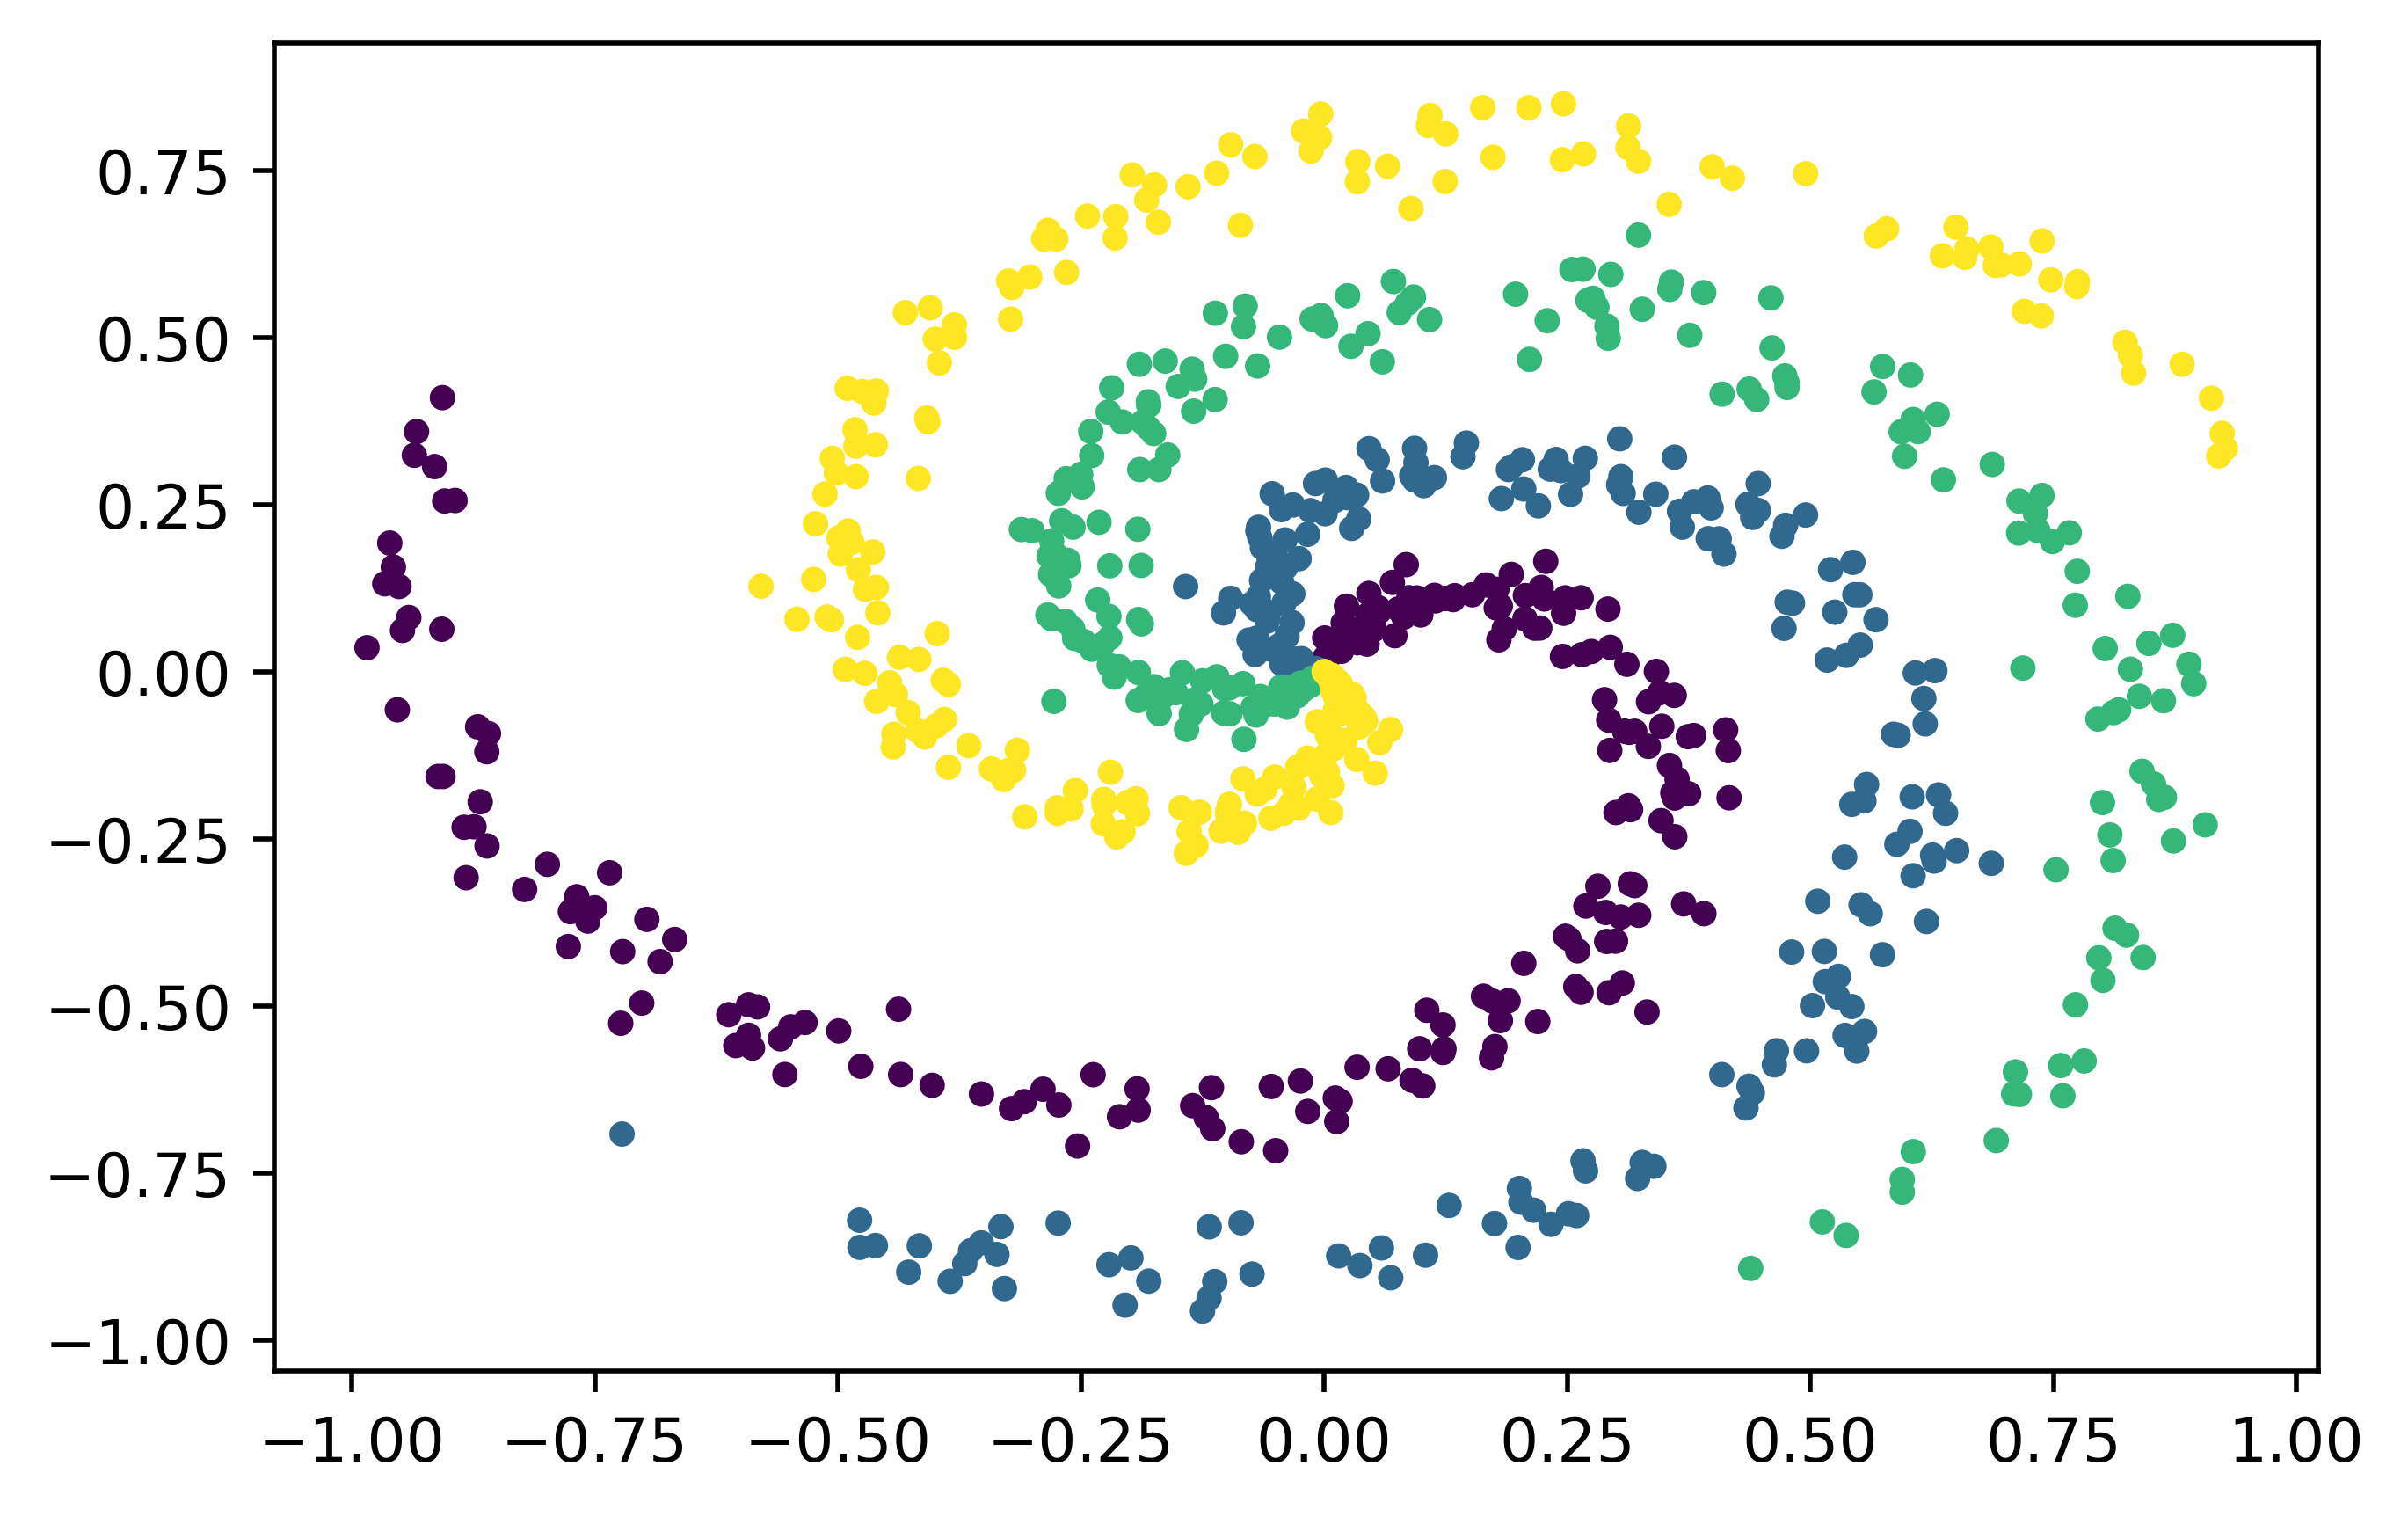

In [5]:
N = 200 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*5,(j+1)*5,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.figure(dpi=500)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)


Good luck drawing 4 lines to seperate those. Now lets create a simple Deep Neural Network like we have been talking on and on about of the correct form to solve this problem. One of PyTorch's strengths is the ability to write what would normally be complex graph structures of a neural network as a normal Python class. If you are comfortable with Python, you will quickly become comfortable with PyTorch as it is designed to act as much like common Python libraries like numpy as reasonable.

In [6]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_classes):
        # Initialize the PyTorch background stuff
        super(SimpleClassifier, self).__init__()
        # Just a few Matrices
        self.input_layer = nn.Linear(2, 10)
        self.hidden_layer1 = nn.Linear(10, 10)
        self.hidden_layer2 = nn.Linear(10, 10)
        self.output_layer = nn.Linear(10, num_classes)
    def forward(self,x):
        # the actual Neural Network forward propogation of the input
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer1(x))
        x = F.relu(self.hidden_layer2(x))
        #x = F.log_softmax(self.output_layer(x))
        x = self.output_layer(x)
        return x
net = SimpleClassifier(4)

Now you are probably thinking: We talked about the layers, but what is a ReLU? There are tonnes of different activation functions you can draw from as a toolbox (Leaky ReLU, ELU, tanh to name a few), but the **Rectified Linear Unit or ReLU** is consider the default. The ReLU is defined as follows:
\begin{align}
  ReLU(x) = max(x, 0)
\end{align}
which looks like:

Text(0.5, 1.0, 'ReLU Activation Function')

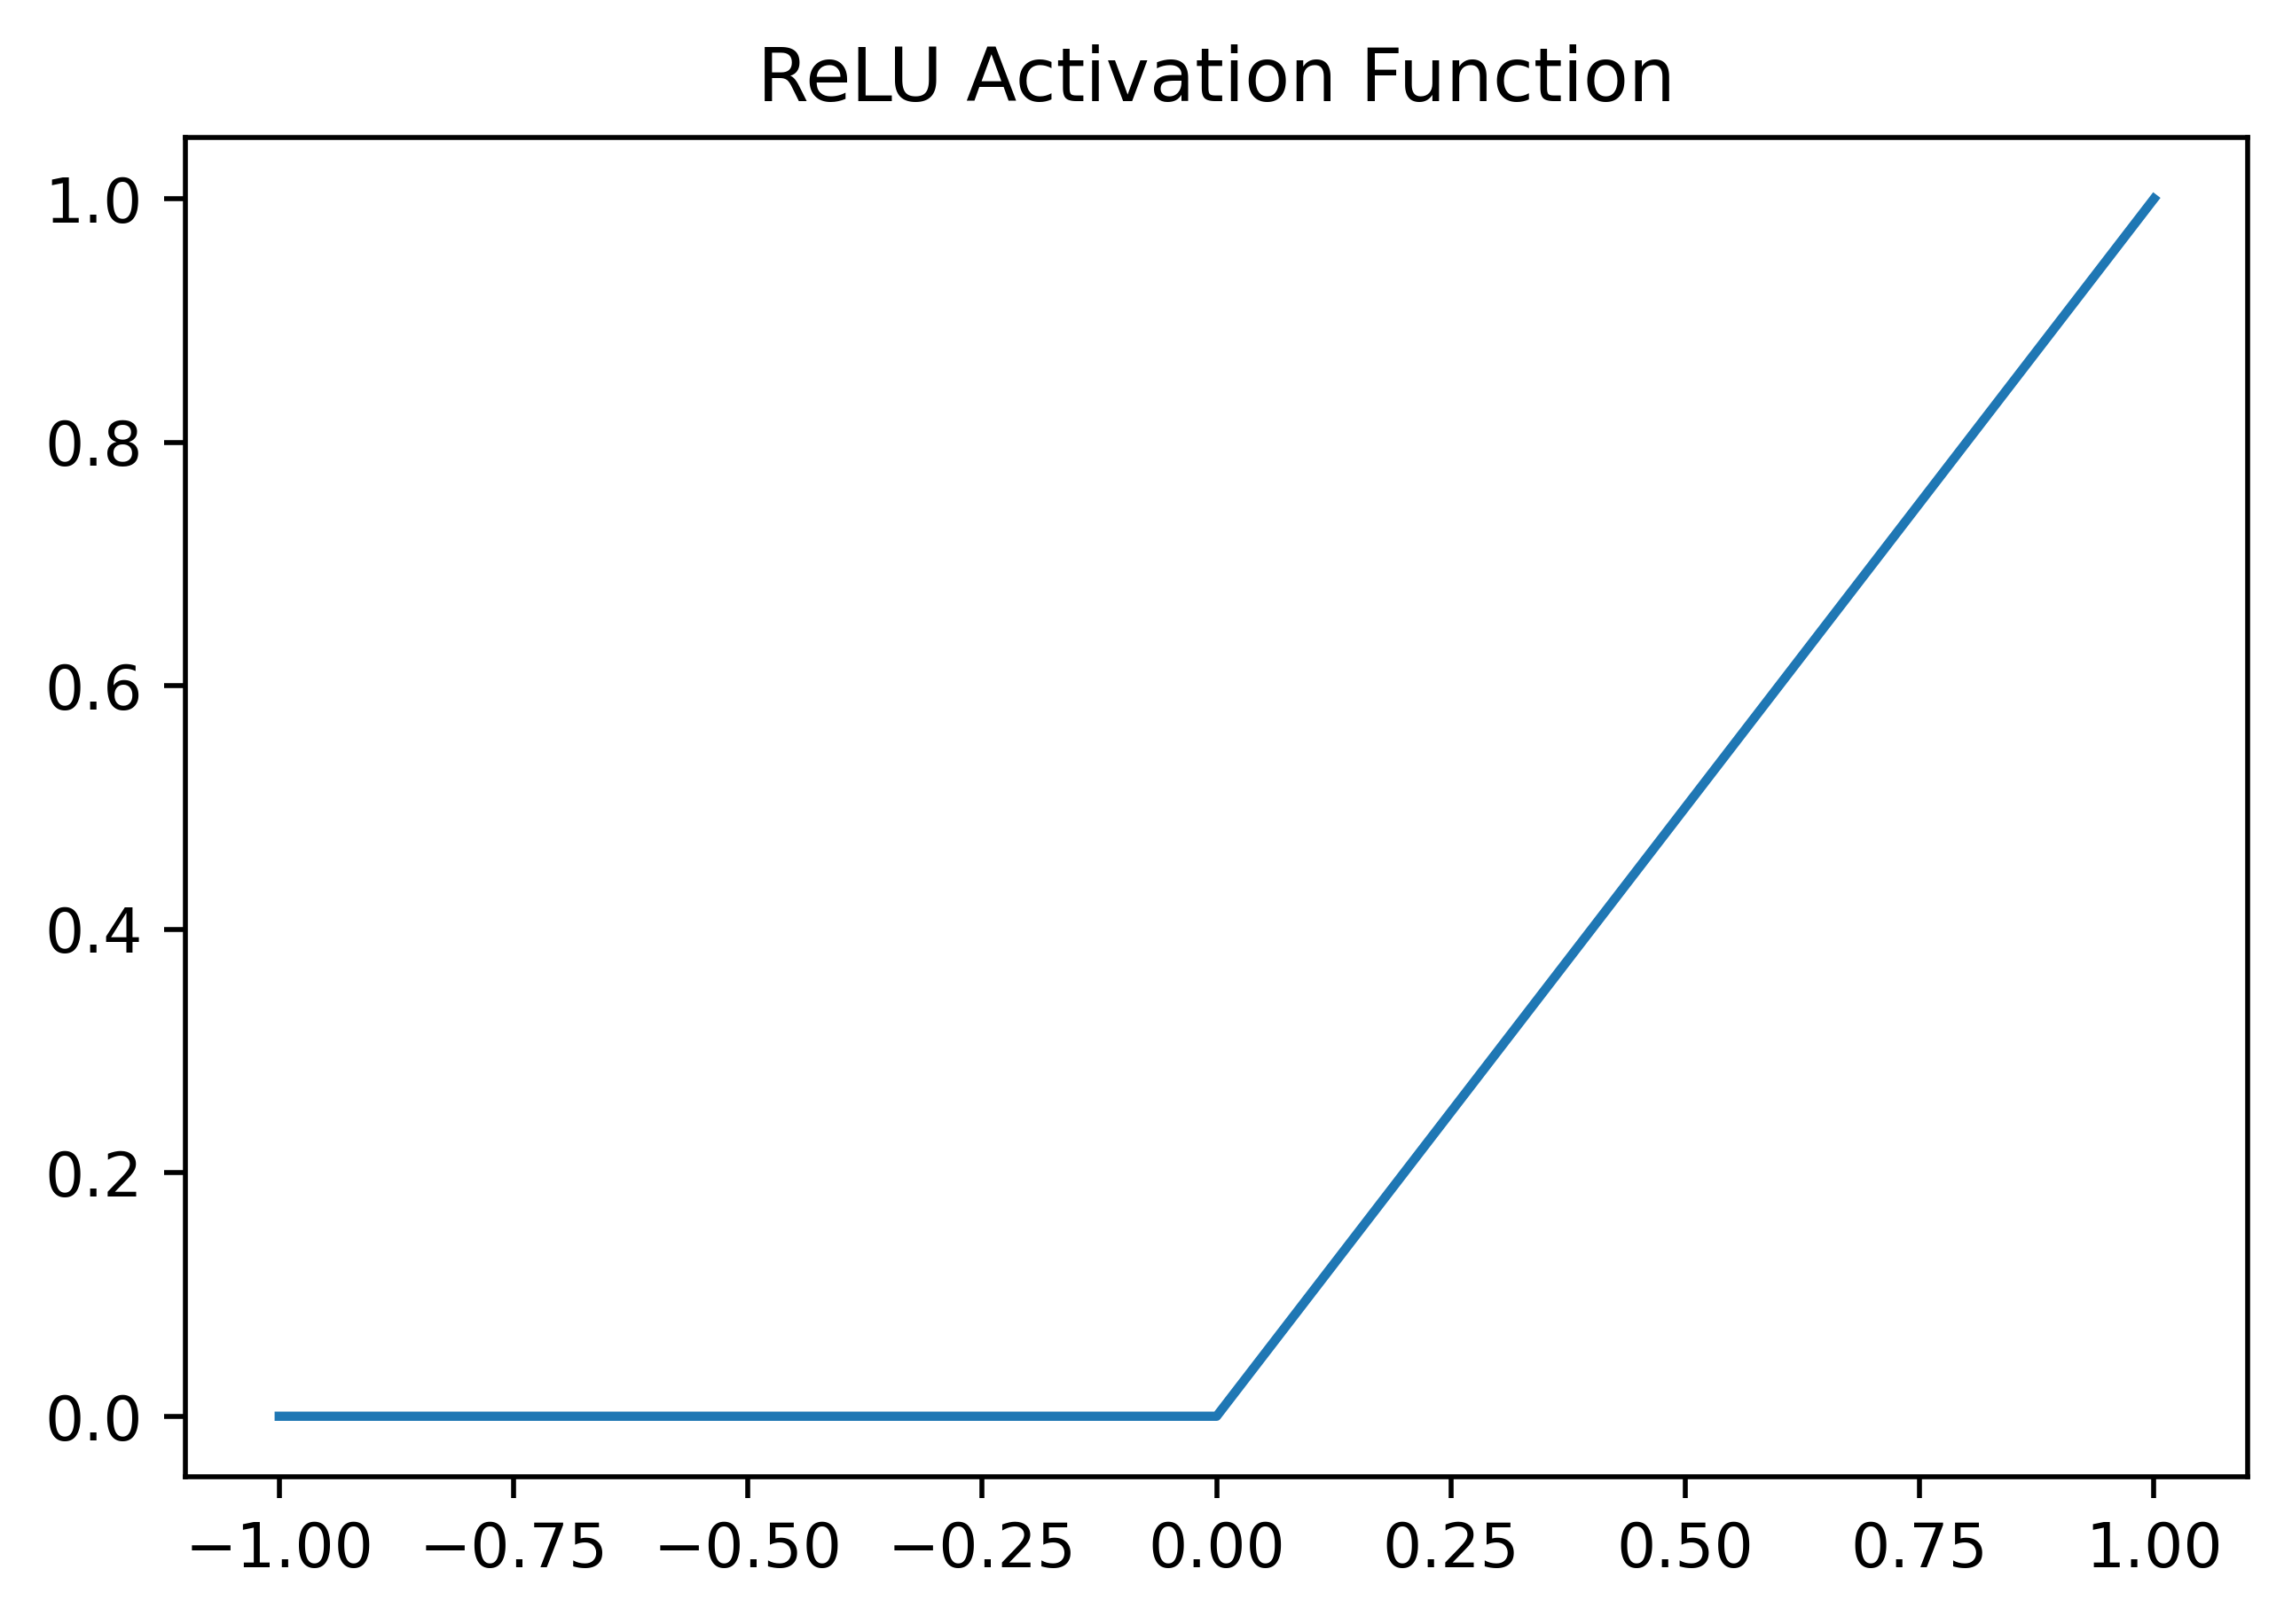

In [7]:

relu_example_x = np.linspace(-1, 1, 101)
plt.figure(dpi=500)
plt.plot(relu_example_x, np.maximum(relu_example_x, 0))
plt.title("ReLU Activation Function")


This clearly satisfies the condition on non-linearity for a activation function for the existance of a function approximation, and it is a extremely simple operation to perform, speeding up training. Emperically, it does quite well on a large class of problems, so it generally the first pick of activation function for most people on most problems.

As for the commented out Softmax function, when we are posing a classification problem as a regression problem, if we have $C$ classes to classify the input into, it is natural to think of the output of the network as a collection of "probabilities" for each class. That way, we can pose the regression problem as giving a probability of 1 for the correct class, and 0 for the others. But finishing with a linear layer is the same as finishing with a arbirary matrix, which would allow the output to be any real value for each of $C$ classes. The **Softmax function** fixes this by transforming a set of $C$ arbitrary real values into a "probability distribution" over $C$ classes as follows, where $i$ is the $i$th class in $C$:
\begin{align}
\text{softmax}_i(x) = \frac{\exp^{x_i}}{\sum_{j=0}^C \exp^{x_j}} 
\end{align}
Which, for a vector $x =(-10, 4, 10, 11)$ looks as follows:

Text(0.5, 1.0, 'Softmax Output Example')

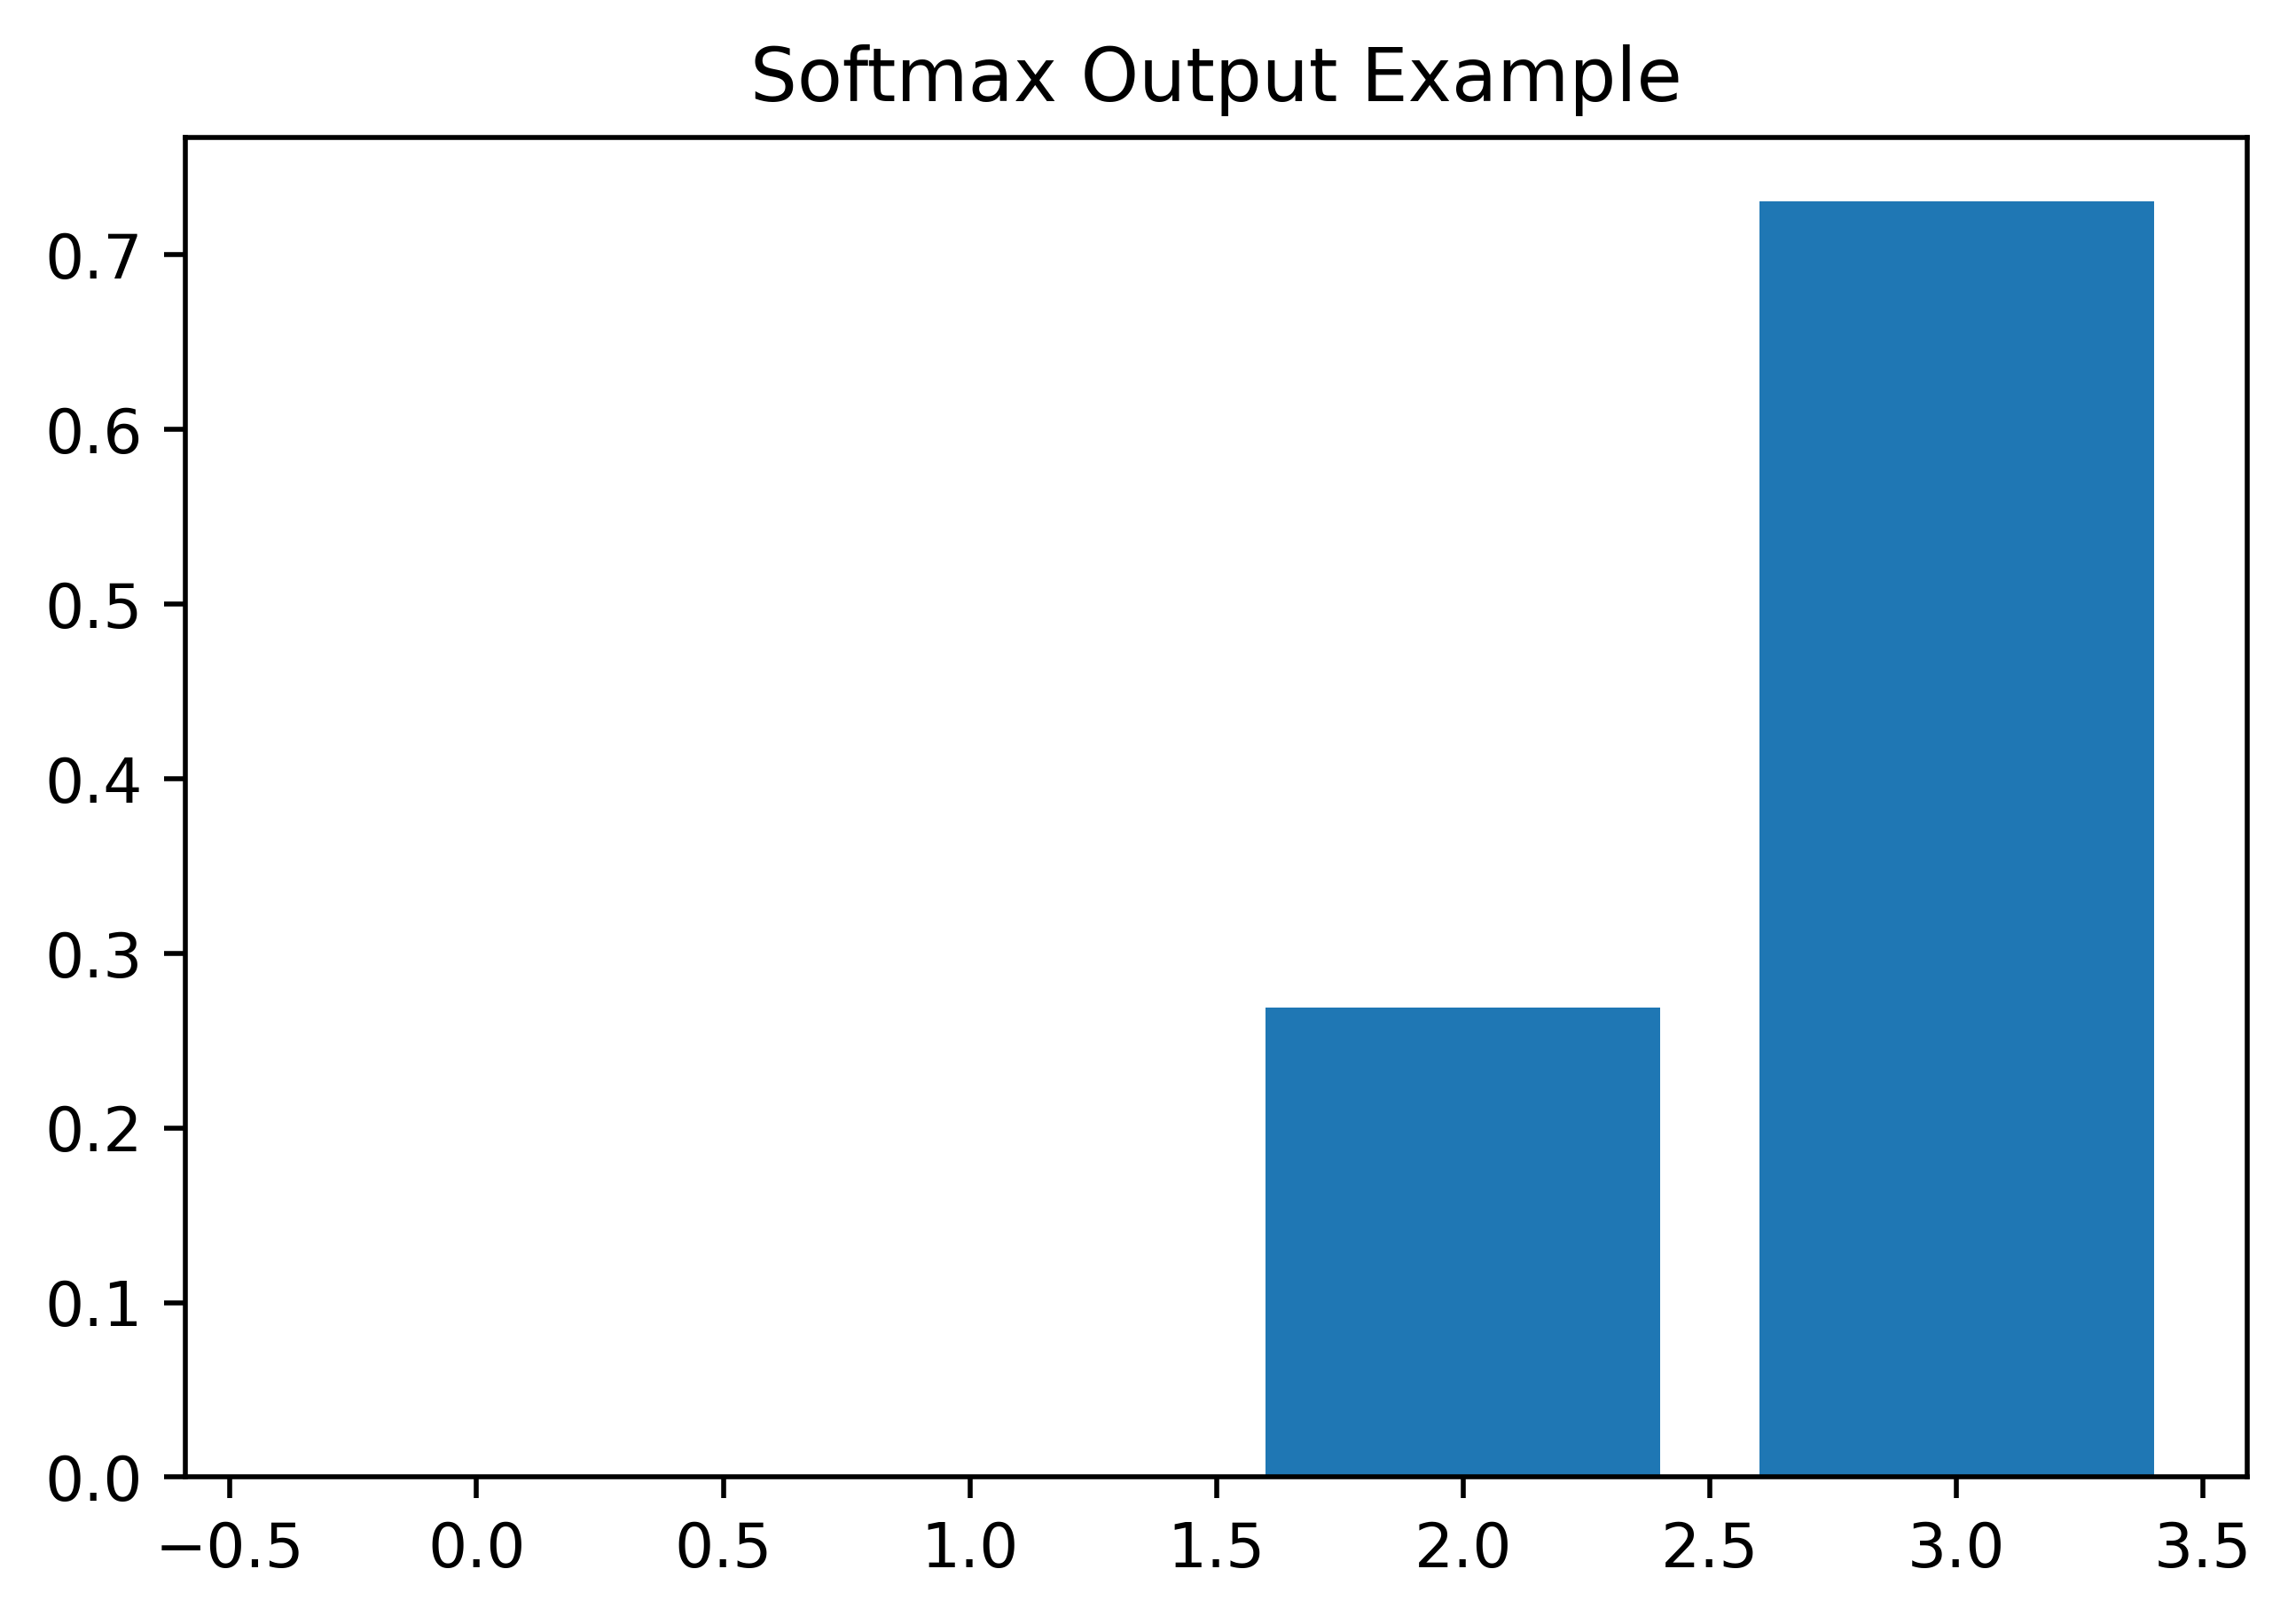

In [8]:
def softmax(x):
    return np.array([np.exp(x_i)/np.sum(np.exp(x)) for x_i in x])
plt.figure(dpi=500)
softmax_example_x = np.array([-10, 4, 10, 11])
plt.bar([0,1,2,3], height=softmax(softmax_example_x))
plt.title("Softmax Output Example")

This is approximately a max function, but it has a important property of being differentiable which will come into play when we train it. You may notice back when we made our network that the commented out line was a log_softmax. This is mostly for numerical reasons, as well as the negative log softmax has the intuitive explination of being posed as being the negative log likelihood and being well suited for the next step. However, we won't need to apply the softmax ourselves, as PyTorch will do it for us later on.

# The Learning Part
Ok so we are finally to the fun part: learning. You will notice that we were careful at every step to choose differentiable functions (or in the case of a ReLU, almost always differentiable) at every step, and that was all so we could make some good, sweeping assumptions here.

As before, finding a set of parameters which correctly approximates the oracle function, and there by the data of intrest, is very hard and there isn't a good algorithm which solves this problem. However, because we chose our component functions of our network carefully, we do know that it is differentiable. Further, we can define a error metric, that being the **Loss Function**, which is a differentiable function $L: H \times X \to \mathbb{R}$ that minimizes when a prediction by our hypothesis $h(x)$ is equal to the realization of $y = f(x)$ for the same given $x$ in the Training Set. Because every composed function in $L(h,x)$ is almost always differentiable, it must also be continuous at the same points where it is differentiable. Because this is a long composition of differentiable functions, we can simply apply the chain rule to this function to compute the gradient of $L(h,x)$ for any given $(x,y)$ in the Training Set. Internally, PyTorch does this by creating a graphical model of the function compositions and then traversing the graph backwards to produce the derivitive.

Here inlies one of the biggest weaknesses of deep learning: We assume that because we can compute the gradient for a given element of the Training Set, we assume that any local minima on the Loss error surface will likely also relate to a pretty good hypothesis model, thus by updating the parameters of our network in the direction of the negative gradient of the loss function we move closer to a local minimum on the loss surface. If each of these steps are small, we call this **Gradient Descent**, which is a common convex optimization approach.

A example of Gradient Decent is shown below:

In [9]:
# From https://en.wikipedia.org/wiki/Gradient_descent
Image(url="https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg")

There are a few problems with this, some are dealt with and some are left as problems for the practitioner.

One problem you may notice is that $X \times Y$ are distributions, which means that the Loss function is transitively a stocastic function and that a given sample is not nessesarily representitive of the expectation of the gradient at a given point in parameter space. This is easily handled by computing the loss gradient over a subset of elements of the Training Set, known as a **Mini-Batch**, and taking the mean loss gradient of all of these to be the gradient which the parameters are updated with. This variation of Gradient Decent is known as **Stocastic Gradient Descent or SGD**, which was really the first optimization method used in Deep Learning. Even to this day, with a few modifications, this is still a powerful optimization tool to train models.

Another problem with this optimization model is that it assumes that all zero gradient parameter poitns on the loss surface are good, and thus it is easy to get "stuck" early on in saddle points and bad local minima. This is a much harder problem to solve. One simple solution is the idea of momentum. When using momentum, we assume that the negative loss gradient is actually a acceleration for the update direction, and that if most loss gradients say to move in a direction in parameter, the loss should update in that direction faster until there is enough evidence to disagree with this. This solves the problem of saddle points, but still sometimes struggles with bad local minima. For this reason, optimizers were long a very popular research topic in Deep Learning. A summary picture is given below:

In [28]:
# Credit to Sebastian Ruder
Image(url="https://miro.medium.com/max/620/1*XVFmo9NxLnwDr3SxzKy-rA.gif")

For most Deep Learning Practitioners, **Adam** (a adaptive learning rate mixture of a few different optimizers) or SGD with Momentum are generally the go-to optimizers for general training. Most people swear by one optimizer or another (or any other thing about deep learning to be honest), the truth is that there are a number of knobs to turn for each of them and the one that will usually work best is the one you have used the most and have the most experience tinkering with. There are problems for which one will be better suited, a notable exception being Adam in the case of sparse inputs, however, this is the exception rather then the rule.

Another problem with this optimization model is that if our training set is not representitive of the true distribution $X \times Y$, then our optimized model will probably not perform well come test time. This problem is much less easy to approach and rarely has a clear solution. Usually the simple answer is more data, but this wont always work such as in the case of a class in a classification problem making up a disproportionate amount of the data. The optimial choice for the network then is just to always pick that class. There are many gotchyas like this, but as long as your dataset is large enough and there is no large skew in your data, this will rarely be a problem.

There are many more problems with this approach, but these summarize some of the biggest ones you will immediately run into when you try and apply Deep Learning to a problem in a target domain.

All of this sounds quite grim for Deep Learning, but it is mearly here to damper your expectations when you go to apply this yourself. With all of that said, these technique do work, often quite effectively, and we will use them to solve our classification problem from above.

We will define our Loss function for our point classification problem to be the **Cross Entropy Loss**, also known as the log loss. This is a measure of the difference between two probability distributions for a given random variable (in our case, the true $y$ for a given $x$ in the training set). In the case of classification where only one class is truely labeled 1 and the rest are labeled with 0 probability, the Cross Entropy Loss is just:
\begin{align}
-\log(h(x)_c)
\end{align}
where $h(x)_c$ is the network output for the $c$th class, being the correct classification. This has the benefit of going to 0 from above as $h(x)_c$ goes to 1 and thus optimizes towards the correct classification.

One of the best things about Deep Learning Frameworks, is once you know the right buttons to push, most everything you want is built in, as is Cross Entropy Loss. Even better, is that the PyTorch implementation applies softmax over the output for you in a numerically stable way to speed up optimization. 

In [29]:
import torch.optim as optim
# Stocastic Gradient Descent w/ Momentum
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

Notice that we defined a coefficient for the momentum to state how much the "velocity" aka the descent gradient should decay at each optimization step so that we don't accrue gradient unbounded over time. There is another parameter being passed into the SGD Optimizer, that being the **Learning Rate (lr)**. This is the scalar multiple of the negative gradient which is actually added to the parameters to limit the size of the step, as too large of a step would likely prevent the optimizer from reaching a local minima and just bouncing around in the loss basin around it, creating a worse performing model. Finally the weight decay parameter adds a **Regularization Term** to our loss function, that is to say, that it penalizes large weight values to prevent optimizing towards numerically unstable models by adding the sum of squared weights times the weight decay parameter to the loss. The momentum, weight decay and learning rate terms are what is known as **Hyperparameters** which are essentially the knobs you have to turn to improve the performance of your model on a task ahead of time. There are whole papers written on automatic hyperparameter tuning, and some of them are very good, such as the learning rate range test from Leslie Smith, however we wont go over them here for the sake of brevity. Generally, on a hard problem, one will have to fiddle with these a bit to get a model which performs at the desired level.

Here is a untrained classifier with random weight initialization:

In [30]:
def plot_class_countor(camera=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float()).detach().numpy()
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    #fig = plt.figure(dpi=500)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if camera:
        camera.snap()
    else:
        plt.show()

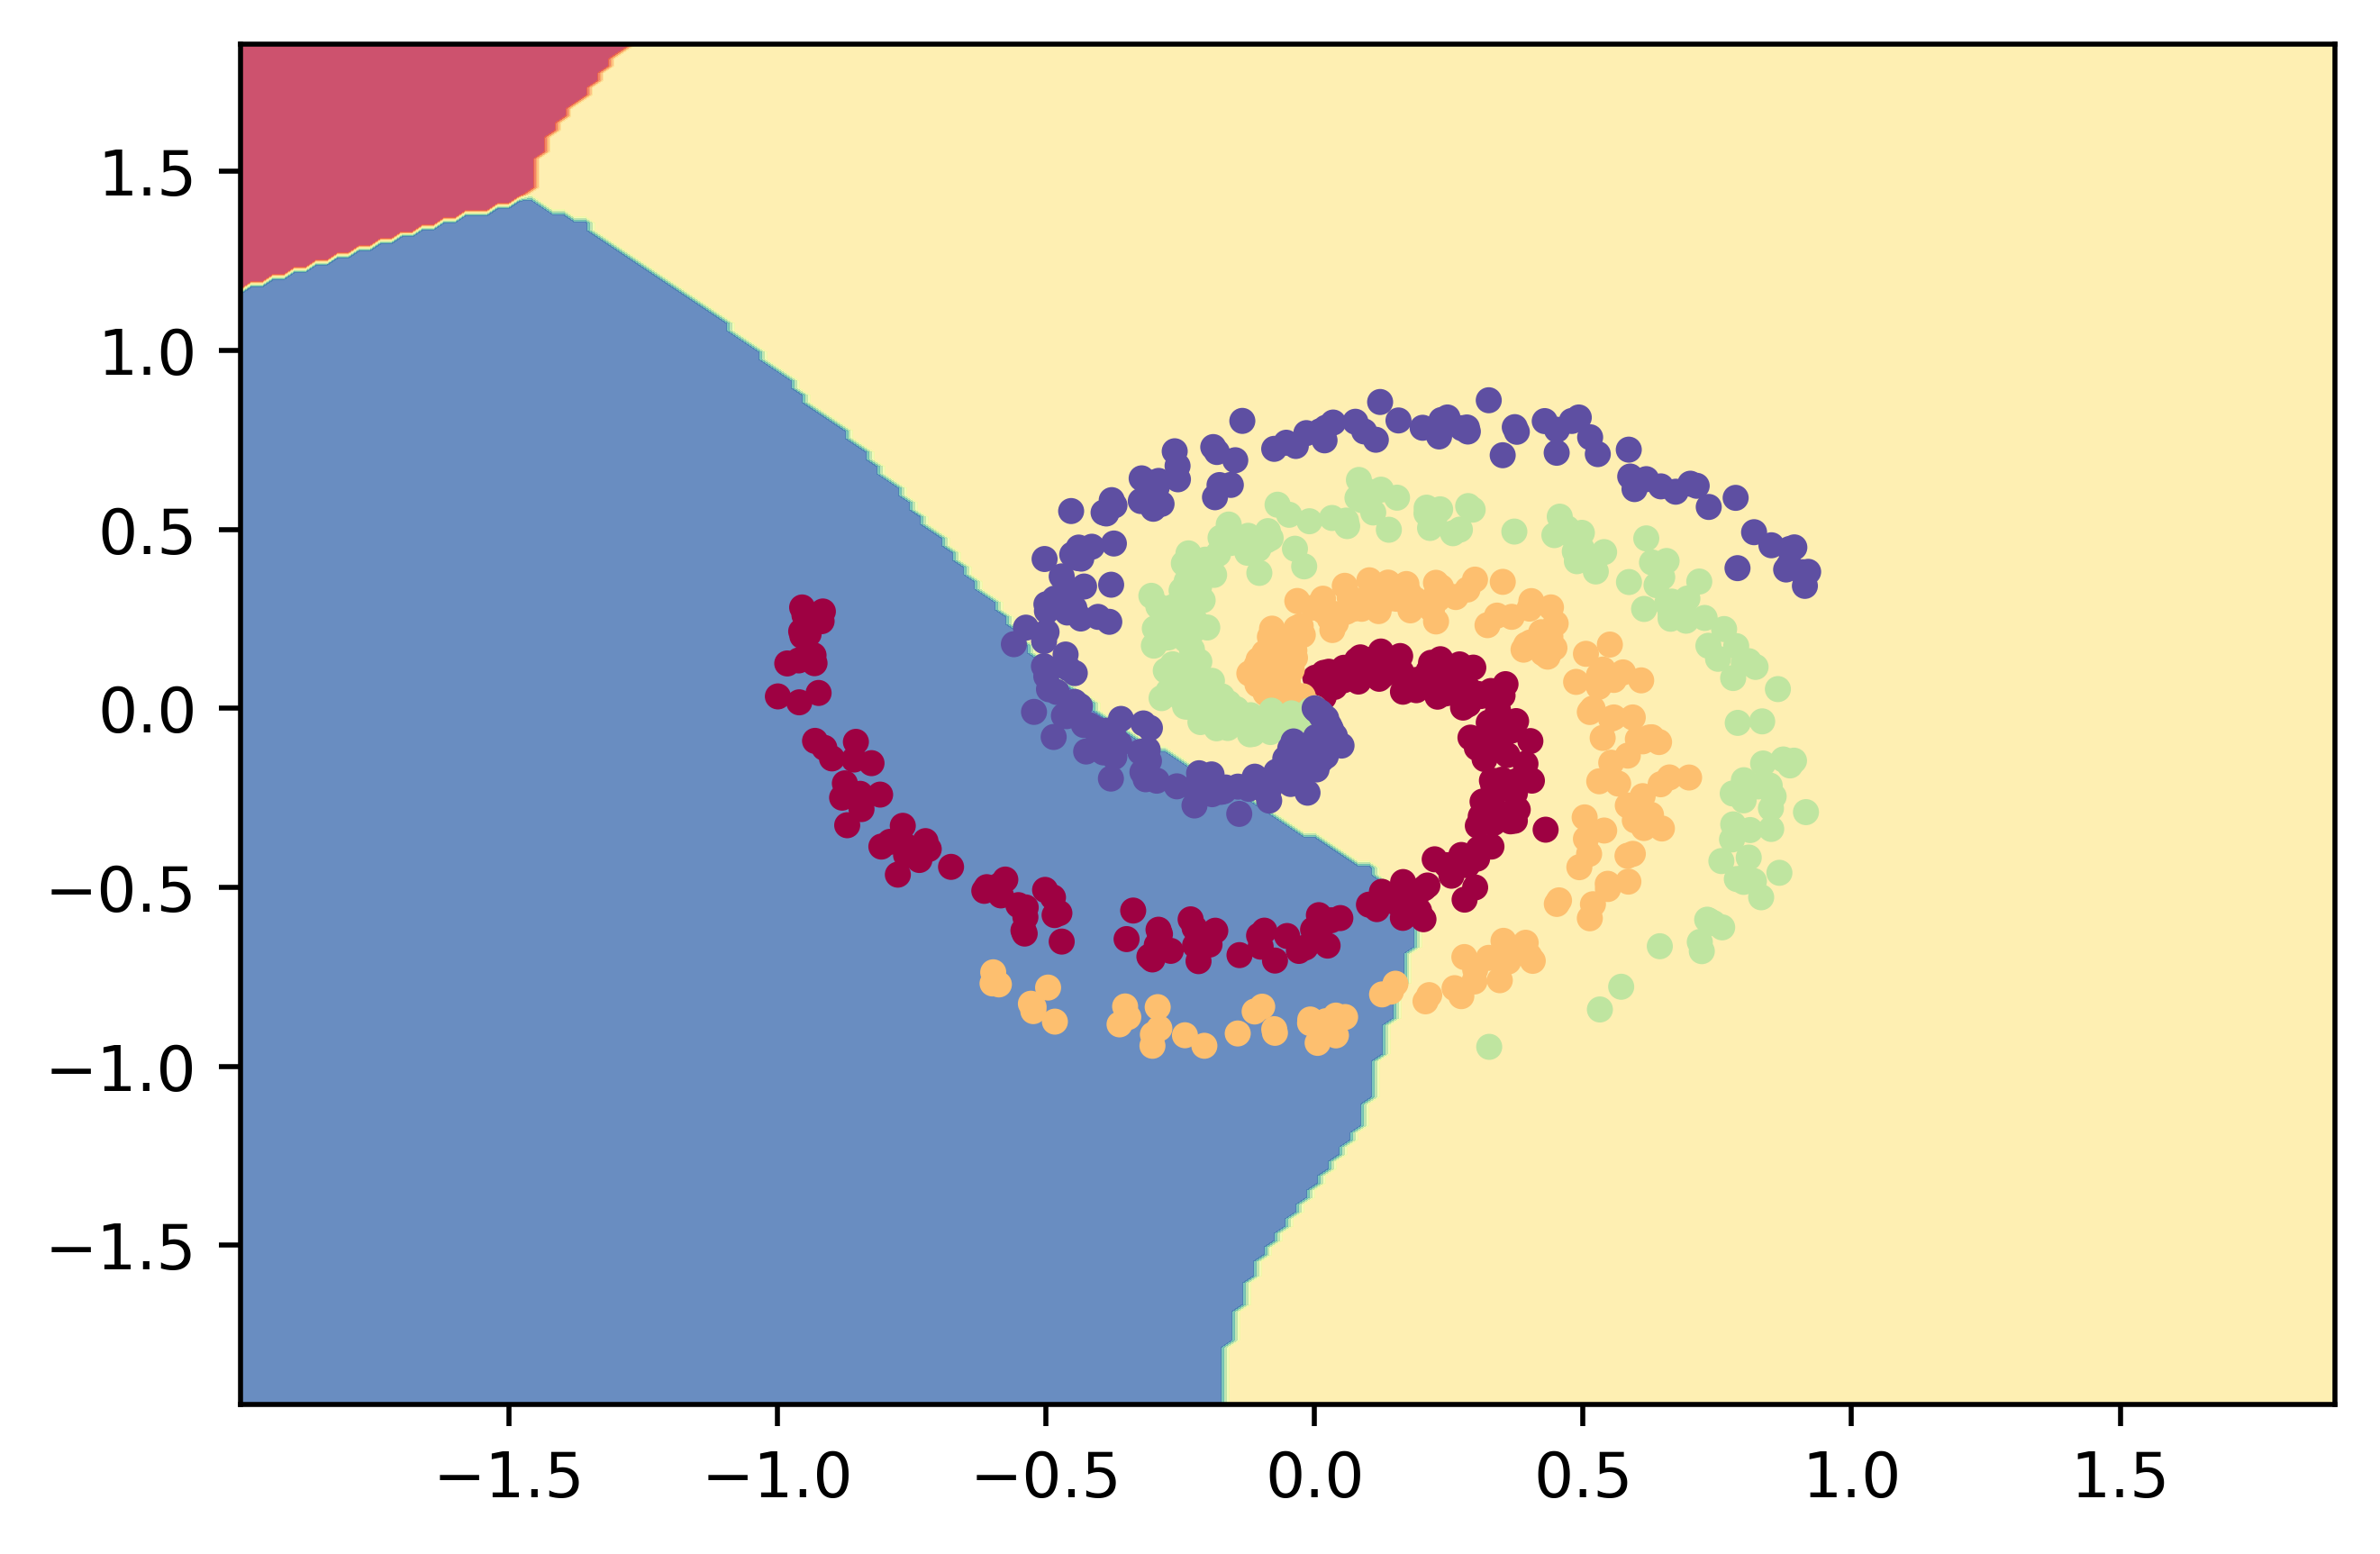

In [31]:
plt.figure(dpi=500)
plot_class_countor()

This is clearly terrible, but we can apply what we just learned to train this network. First we define a PyTorch dataset class to feed our training. We will use similar code as above to generate the dataset, just in a different housing:

In [32]:
from torch.utils.data import Dataset, DataLoader

class SpiralDataset(Dataset):
    def __init__(self,num_classes, num_points_per_class):
        N = num_points_per_class
        D = 2 # dimensionality
        K = num_classes
        self.X = np.zeros((N*K,D)) # data matrix (each row = single example)
        self.y = np.zeros(N*K, dtype='uint8') # class labels
        for j in range(K):
            ix = range(N*j,N*(j+1))
            r = np.linspace(0.0,1,N) # radius
            t = np.linspace(j*5,(j+1)*5,N) + np.random.randn(N)*0.2 # theta
            self.X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            self.y[ix] = j
        self.num_classes = num_classes
        self.num_points_per_class = num_points_per_class
    def __len__(self):
        return self.num_classes * self.num_points_per_class
    def __getitem__(self, idx):
        return (torch.tensor(self.X[idx]).float(), torch.tensor(self.y[idx], dtype=torch.long))

spiral_dataset = SpiralDataset(4, 5000)
spiral_dataset[0]

(tensor([0., 0.]), tensor(0))

We can then make a DataLoader with our Dataset. These are generally far more useful in the case of very large datasets, where each sample could include a image and the whole dataset could not fit in RAM. The DataLoader allows us to set up a number of parallel workers to load datapoints from disk while the network is training to minimize down time for the training process. For our case, this is overkill, however the batch_size and dataset shuffling options are very useful to us. 

Right now, our dataset is ordered based on class, however the underlying assumption of SGD we made above was that the samples were i.i.d. (independent, identically distributed) and thus that they were random samples from the distribution $X \times Y$, otherwise would couldn't realistically say that the mean of the loss gradients of the mini-batch was representitive of the true loss gradient at that point. But if we randomly shuffle the set, we can convince ourselves that each sample is close enough to a i.i.d. sample that the gradient will be representitive.

In [33]:
dataloader = DataLoader(spiral_dataset, batch_size=10, shuffle=True)

Now, we can bring everything together. Note that a **Epoch** is one full sweep through the dataset. We perform optimization over 15 epochs where for each mini-batch we predict the correct class distribution, compute the cross entropy loss,compute the mean negative gradient times the learning rate and add it to our gradient velocity. We then step each parameter towards the direction of the accumulated negative gradient.

[1,   300] loss: 0.208
[1,   600] loss: 0.206
[1,   900] loss: 0.206
[1,  1200] loss: 0.204
[1,  1500] loss: 0.201
[1,  1800] loss: 0.198
[2,   300] loss: 0.192
[2,   600] loss: 0.189
[2,   900] loss: 0.187
[2,  1200] loss: 0.185
[2,  1500] loss: 0.186
[2,  1800] loss: 0.182
[3,   300] loss: 0.178
[3,   600] loss: 0.177
[3,   900] loss: 0.173
[3,  1200] loss: 0.169
[3,  1500] loss: 0.163
[3,  1800] loss: 0.162
[4,   300] loss: 0.154
[4,   600] loss: 0.149
[4,   900] loss: 0.145
[4,  1200] loss: 0.139
[4,  1500] loss: 0.135
[4,  1800] loss: 0.129
[5,   300] loss: 0.125
[5,   600] loss: 0.123
[5,   900] loss: 0.118
[5,  1200] loss: 0.115
[5,  1500] loss: 0.112
[5,  1800] loss: 0.113
[6,   300] loss: 0.108
[6,   600] loss: 0.101
[6,   900] loss: 0.105
[6,  1200] loss: 0.102
[6,  1500] loss: 0.099
[6,  1800] loss: 0.095
[7,   300] loss: 0.090
[7,   600] loss: 0.090
[7,   900] loss: 0.087
[7,  1200] loss: 0.086
[7,  1500] loss: 0.080
[7,  1800] loss: 0.080
[8,   300] loss: 0.076
[8,   600] 

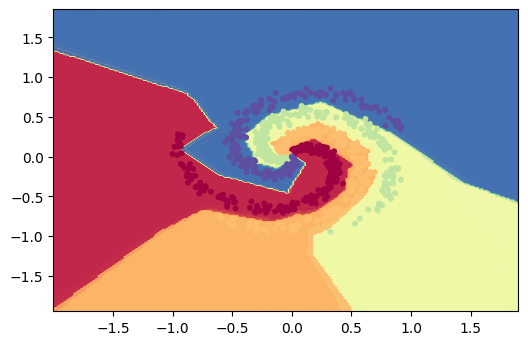

In [34]:
fig = plt.figure(dpi=100)
camera = Camera(fig)

for epoch in range(15):
    running_loss = 0.0
    for i, data in enumerate(dataloader):
        inputs, labels = data
        # zero gradient accumulator
        optimizer.zero_grad()
        # predict E[Y|X]
        outputs = net(inputs)
        # calculate loss
        loss = loss_function(outputs, labels)
        # do chain rule to calculate mean gradient over samples
        loss.backward()
        #step towards the mean negative gradient
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 300 == 299:    # print every 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            plot_class_countor(camera)

In [35]:
animation = camera.animate()
animation.save('spiral_training.gif', writer = 'imagemagick')

## Ta-da!

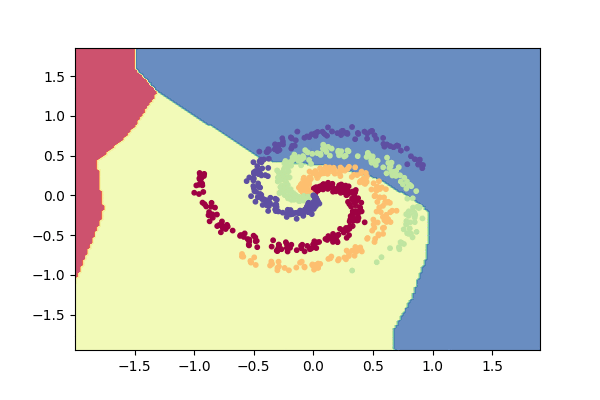

In [36]:
Image("./spiral_training.gif")